# Genre recognition: experiment

Goal: observe the effect of $\lambda_g$ on a small dataset.

Conclusion: no ideal value for $\lambda_g$ has been found. Gave the idea that we want to trade smoothness with sparsity.

Observations:
* Accuracy almost constant, drops for $\lambda_g$ greater than 1000.
* Constant running time. Increase of 50% compared to the model without a graph.
* Sparsity increases linearly with $\lambda_g$.
* Compare atoms.
* Lots of variance between cross-validation runs: e.g. from 70 to 73. We should take the mean of the various runs. Done for next experiment.
* The gap between the Dirichlet energy and the other objectives is reduced from 2 orders of magnitude to 1 as $\lambda_g$ becomes greater than 100.
* $Z$ is much more constrained than $D$ (inner loop iterations).
* We want to trade smoothness with sparsity, not reconstruction error (controlled by $\lambda_d$). Try to set $\lambda_d = \lambda_g$, i.e. vary the redundant $\lambda_s$.
* Ran for 4h50.

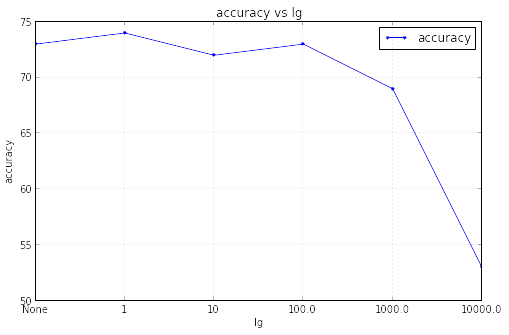

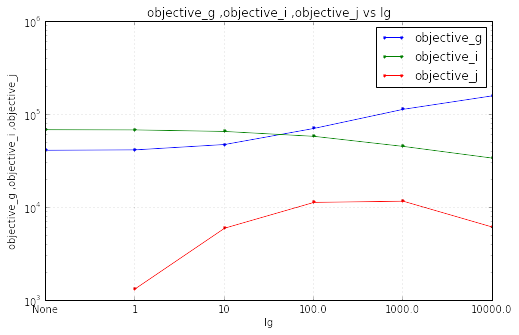

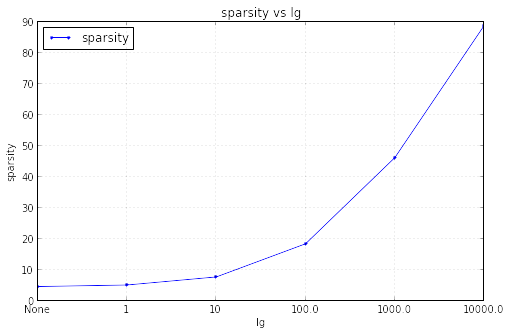

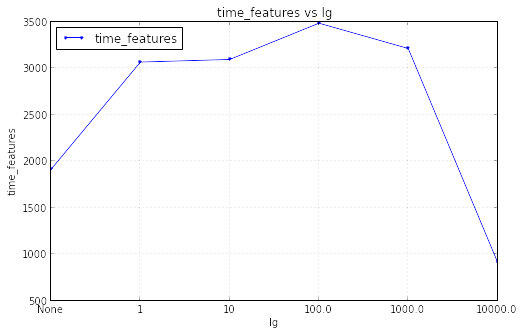

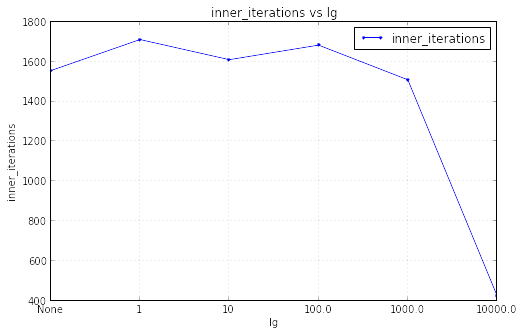

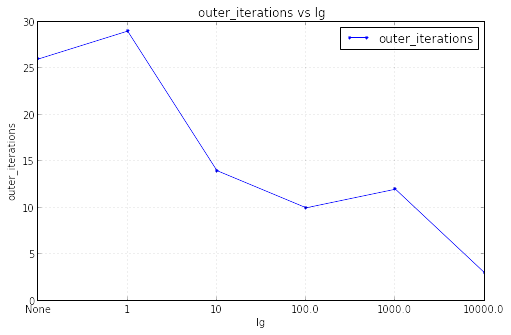

In [53]:
time_features = [1915, 3067, 3095, 3485, 3213, 916]
inner_iterations = [1555, 1711, 1610, 1683, 1509, 425]
outer_iterations = [26, 29, 14, 10, 12, 3]
sparsity = [4.6, 5.1, 7.7, 18.4, 46.2, 88.8]
objective_g = [4.156377e+04, 4.197443e+04, 4.792657e+04, 7.133035e+04, 1.145442e+05, 1.600268e+05]
objective_i = [6.914378e+04, 6.879492e+04, 6.621795e+04, 5.868650e+04, 4.573782e+04, 3.421723e+04]
objective_j = [0, 1.349397e+03, 6.038886e+03, 1.143229e+04, 1.177662e+04, 6.200758e+03]
accuracy = [73, 74, 72, 73, 69, 53]

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    for var in args:
        pltfunc(x, globals()[var], '.-', label=var)
    plt.xlim(0, len(Pvalues)-1)
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

plot('accuracy')
plot('objective_g', 'objective_i', 'objective_j', log=True)
plot('sparsity')
plot('time_features')
plot('inner_iterations')
plot('outer_iterations')

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'lg'
Pvalues = [None, 1, 10, 1e2, 1e3, 1e4]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'cosine'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5

### Numerical parameters

In [3]:
# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-6  # 1e-3, 1e-5, 1e-7
p['N_outer'] = 40  # 10, 15, 20

# Classification.
p['Ncv'] = 10
p['dataset_classification'] = 'Z'

## Processing

Data: (149000, 96), float32
Elapsed time: 174.13 seconds
All self-referenced in the first column: True
dist in [0.0, 0.418610453606]
w in [0.0562636144459, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2367336,), float32
  L_indices : (2367336,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2367336,), float32
  W_indices : (2367336,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 183.07 seconds

--------------------------------------------------

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123,648,000 floats
  dim: 123,648 features per clip
  shape: (10, 100, 

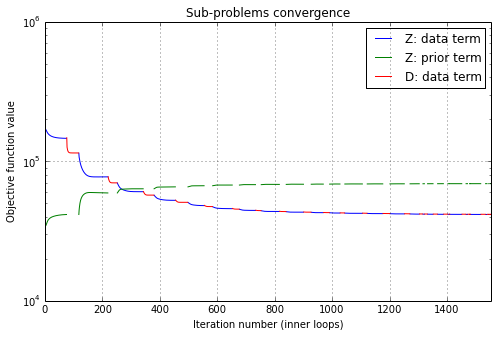

Inner loop: 1555 iterations
g(Z) = ||X-DZ||_2^2 = 4.156377e+04
rdiff: 0.00281476331612
i(Z) = ||Z||_1 = 6.914378e+04


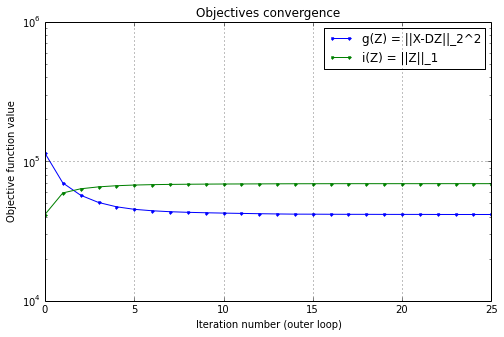

Global objective: 1.107076e+05


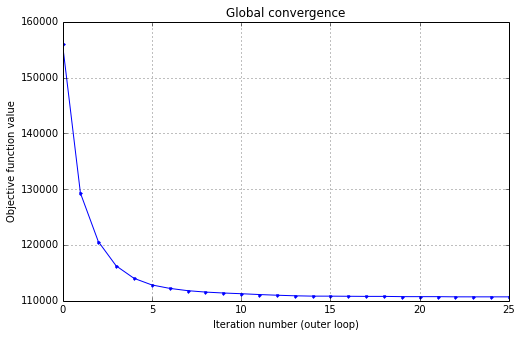

Outer loop: 26 iterations

Z in [-1.25696384907, 1.62027561665]
Sparsity of Z: 875,165 non-zero entries out of 19,072,000 entries, i.e. 4.6%.


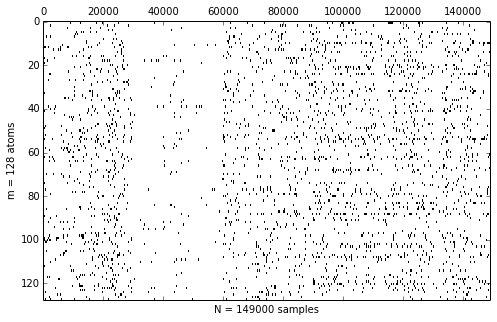

D in [-0.809242725372, 0.939565658569]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


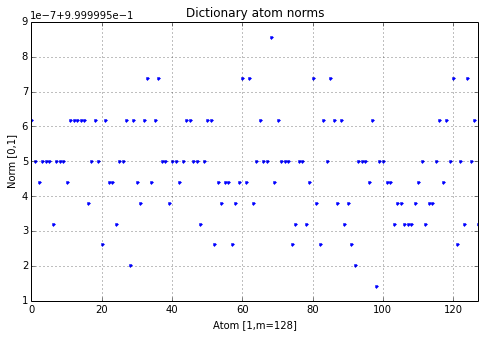

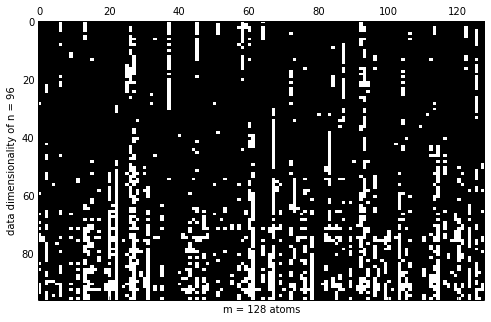

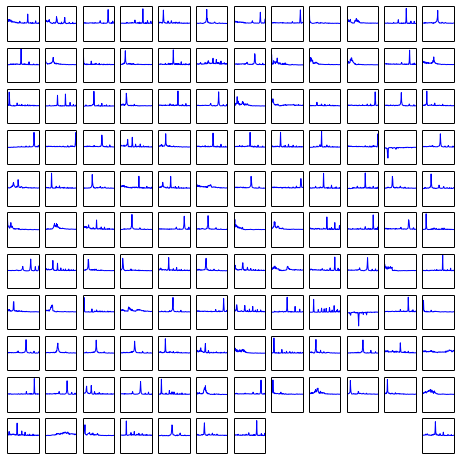

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 1922 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 f

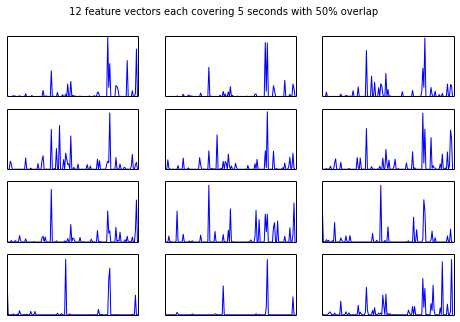

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 74.1 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.3 %
Clips accuracy: 70.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 71 (+/-  7.5) <- [ 0.7   0.8   0.66  0.58  0.68  0.76  0.72  0.6   0.78  0.8 ]
 70 (+/-  6.5) <- [ 0.66  0.68  0.74  0.56  0.76  0.72  0.76  0.74  0.62  0.76]
 71 (+/-  5.5) <- [ 0.76  0.72  0.8   0.74  0.66  0.66  0.62  0.76  0.74  0.66]
 73 (+/-  4.8) <- [ 0.7   0.7   0.72  0.7   0.68  0.72  0.7   0.82  0.82  0.7 ]
 71 (+/-  4.8) <- [ 0.64  0.7   0.78  0.8   0.68  0.7   0.72  0.68  0.76  0.68]
 71 (+/-  4.7) <- [ 0.66  0.8   0.72  0.62  0.7   0.76  0.7

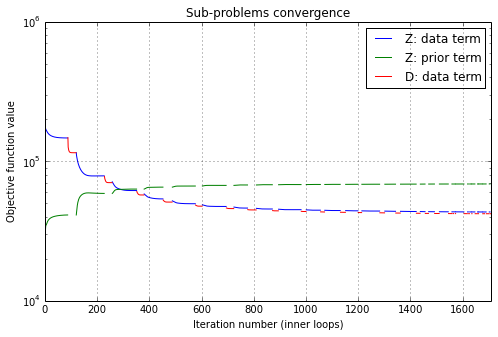

Inner loop: 1711 iterations
g(Z) = ||X-DZ||_2^2 = 4.197443e+04
rdiff: 0.00267776003901
i(Z) = ||Z||_1 = 6.879492e+04
j(Z) = tr(Z^TLZ) = 1.349397e+03


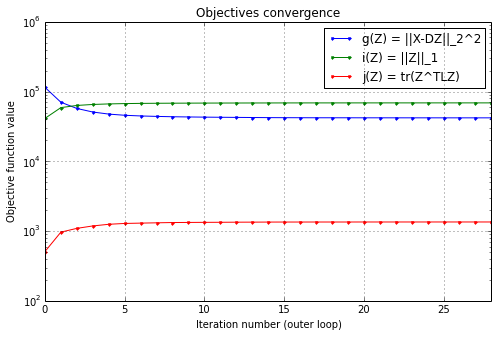

Global objective: 1.121188e+05


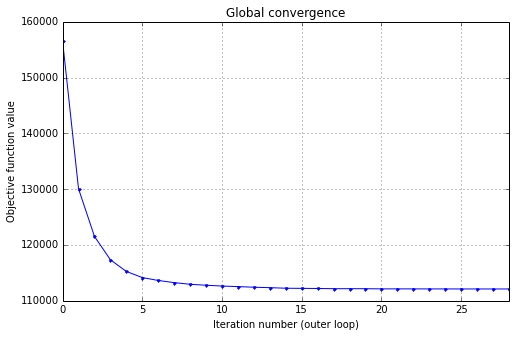

Outer loop: 29 iterations

Z in [-1.05637359619, 1.47232508659]
Sparsity of Z: 970,772 non-zero entries out of 19,072,000 entries, i.e. 5.1%.


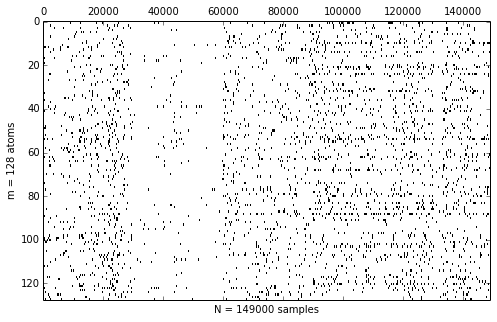

D in [-0.818693161011, 0.937262773514]
d in [0.999999582767, 1.00000047684]
Constraints on D: True


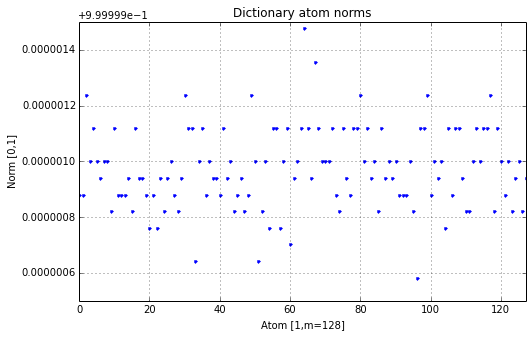

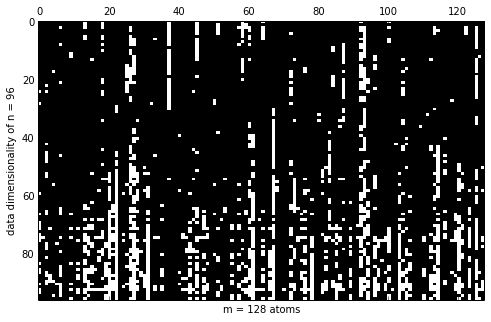

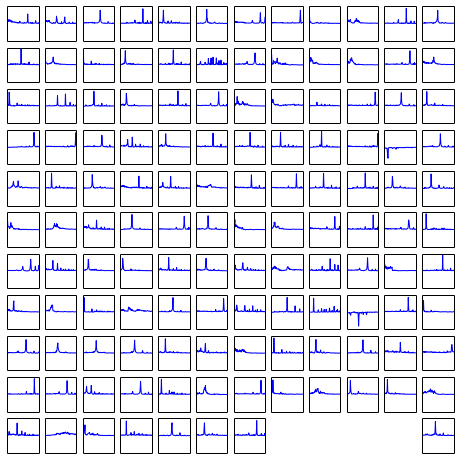

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 3074 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 f

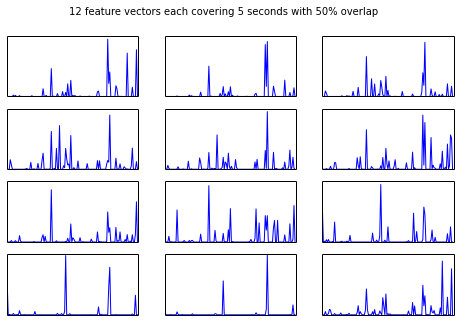

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 74.1 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 61.7 %
Clips accuracy: 69.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 72 (+/-  6.9) <- [ 0.64  0.82  0.68  0.6   0.72  0.8   0.68  0.68  0.76  0.78]
 71 (+/-  5.9) <- [ 0.66  0.72  0.7   0.64  0.78  0.84  0.72  0.68  0.66  0.66]
 71 (+/-  4.7) <- [ 0.74  0.72  0.76  0.74  0.7   0.68  0.62  0.74  0.78  0.66]
 74 (+/-  5.5) <- [ 0.72  0.72  0.72  0.72  0.66  0.76  0.72  0.8   0.86  0.68]
 72 (+/-  7.6) <- [ 0.56  0.66  0.76  0.78  0.66  0.72  0.78  0.68  0.84  0.72]
 72 (+/-  4.6) <- [ 0.68  0.82  0.72  0.64  0.76  0.72  0.7

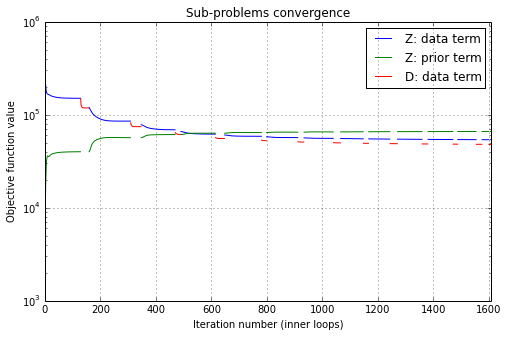

Inner loop: 1610 iterations
g(Z) = ||X-DZ||_2^2 = 4.792657e+04
rdiff: 0.00346171679269
i(Z) = ||Z||_1 = 6.621795e+04
j(Z) = tr(Z^TLZ) = 6.038886e+03


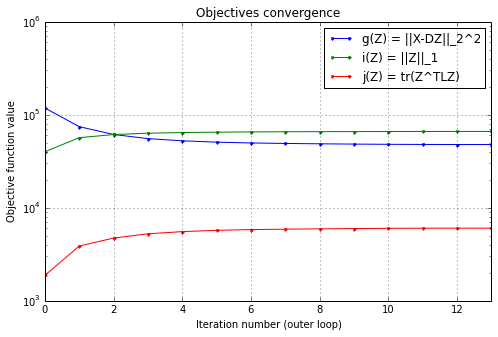

Global objective: 1.201834e+05


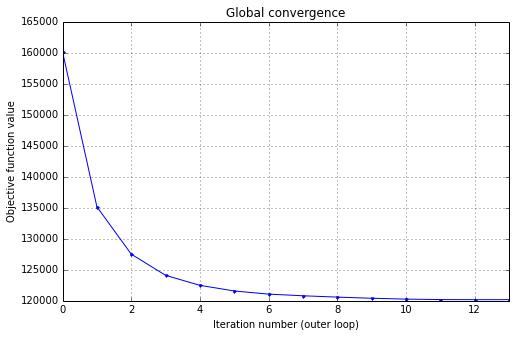

Outer loop: 14 iterations

Z in [-0.477136224508, 1.17480039597]
Sparsity of Z: 1,475,033 non-zero entries out of 19,072,000 entries, i.e. 7.7%.


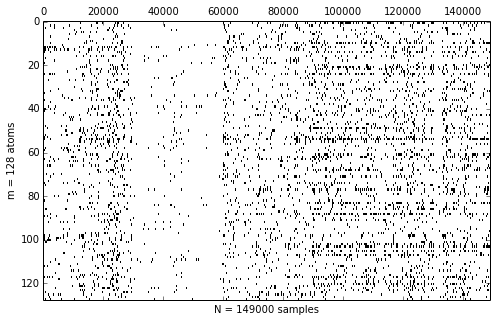

D in [-0.740027308464, 0.912485957146]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


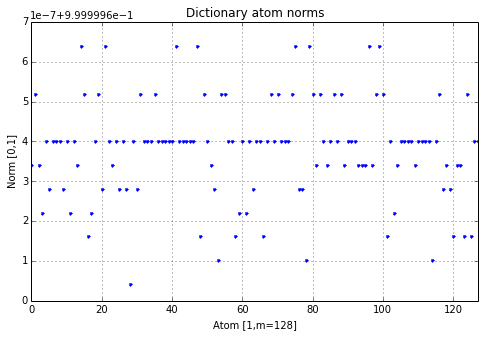

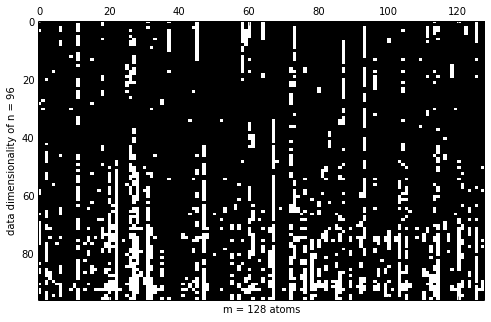

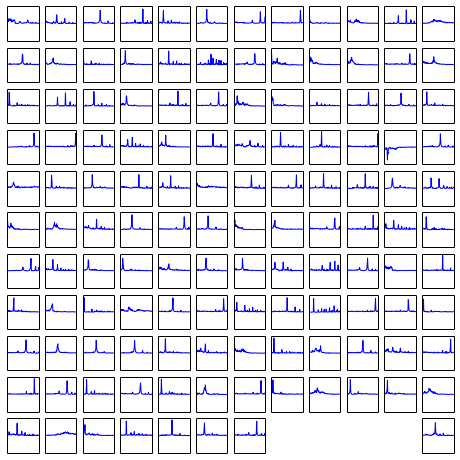

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 3102 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 f

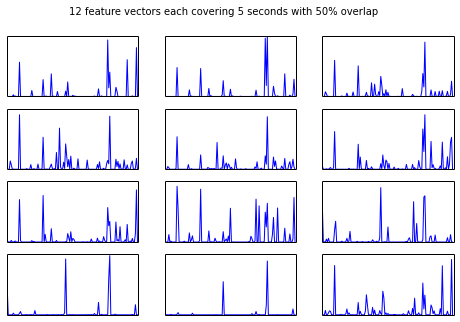

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 75.0 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 61.1 %
Clips accuracy: 70.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 70 (+/-  4.2) <- [ 0.68  0.76  0.7   0.66  0.64  0.74  0.68  0.64  0.74  0.74]
 69 (+/-  8.4) <- [ 0.62  0.7   0.76  0.54  0.82  0.8   0.72  0.68  0.6   0.68]
 71 (+/-  4.3) <- [ 0.74  0.68  0.74  0.66  0.7   0.7   0.64  0.78  0.76  0.74]
 71 (+/-  7.5) <- [ 0.56  0.68  0.7   0.7   0.62  0.7   0.74  0.82  0.82  0.72]
 71 (+/-  4.2) <- [ 0.62  0.68  0.7   0.76  0.74  0.7   0.76  0.7   0.76  0.7 ]
 72 (+/-  5.0) <- [ 0.66  0.74  0.72  0.66  0.82  0.72  0.7

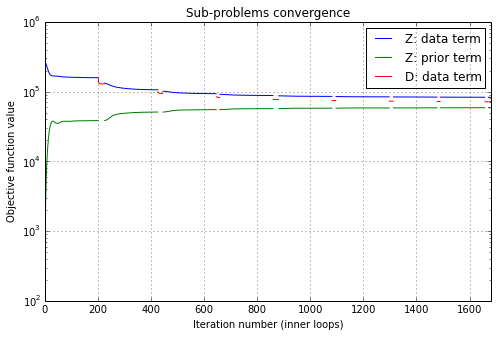

Inner loop: 1683 iterations
g(Z) = ||X-DZ||_2^2 = 7.133035e+04
rdiff: 0.00123024645659
i(Z) = ||Z||_1 = 5.868650e+04
j(Z) = tr(Z^TLZ) = 1.143229e+04


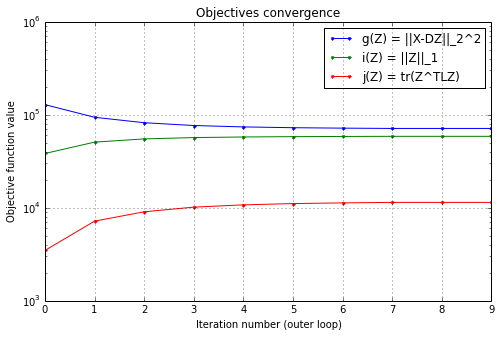

Global objective: 1.414491e+05


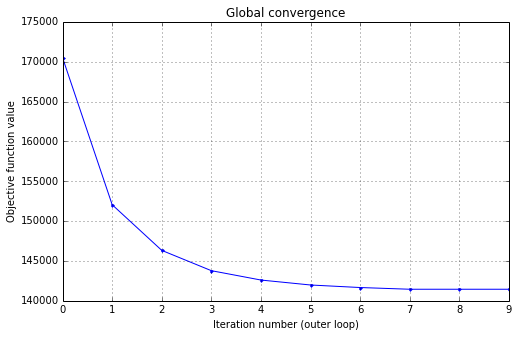

Outer loop: 10 iterations

Z in [-0.0622419342399, 1.01885557175]
Sparsity of Z: 3,506,138 non-zero entries out of 19,072,000 entries, i.e. 18.4%.


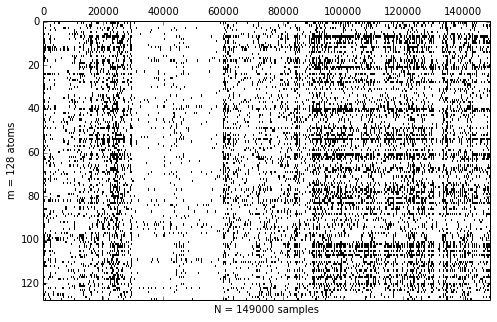

D in [-0.0309991780668, 0.920943379402]
d in [0.999999582767, 1.00000035763]
Constraints on D: True


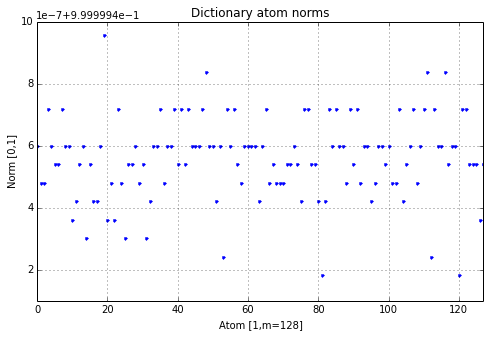

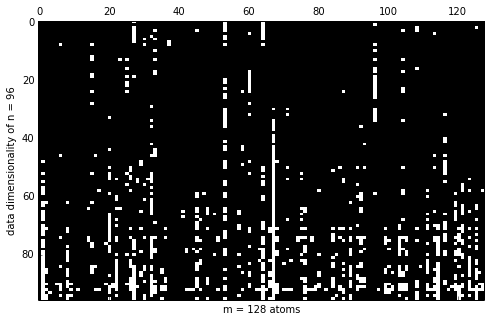

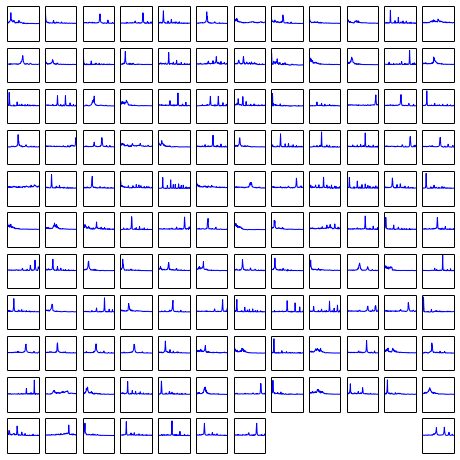

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 3492 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 f

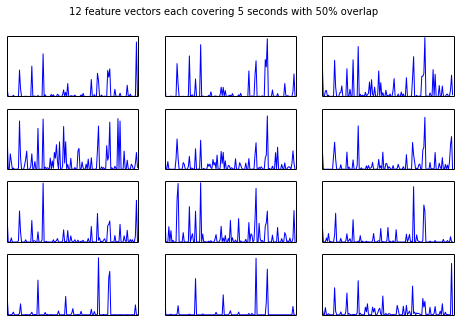

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.0 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.7 %
Clips accuracy: 70.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 73 (+/-  4.4) <- [ 0.76  0.72  0.68  0.7   0.7   0.82  0.7   0.68  0.78  0.72]
 72 (+/-  3.5) <- [ 0.72  0.76  0.76  0.64  0.74  0.72  0.72  0.74  0.72  0.68]
 73 (+/-  5.1) <- [ 0.76  0.82  0.78  0.74  0.78  0.66  0.66  0.74  0.7   0.7 ]
 72 (+/-  4.6) <- [ 0.64  0.78  0.68  0.74  0.68  0.74  0.74  0.74  0.8   0.7 ]
 71 (+/-  4.9) <- [ 0.74  0.78  0.64  0.78  0.7   0.7   0.76  0.64  0.72  0.68]
 73 (+/-  3.4) <- [ 0.7   0.8   0.74  0.72  0.74  0.72  0.7

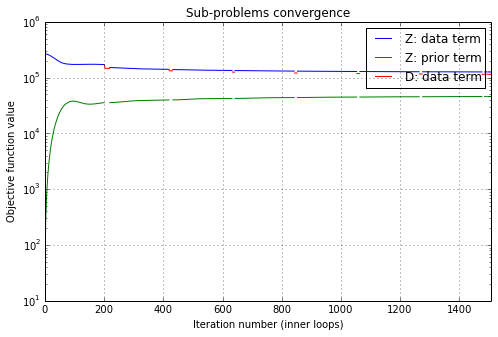

Inner loop: 1509 iterations
g(Z) = ||X-DZ||_2^2 = 1.145442e+05
rdiff: 0.000884876305308
i(Z) = ||Z||_1 = 4.573782e+04
j(Z) = tr(Z^TLZ) = 1.177662e+04


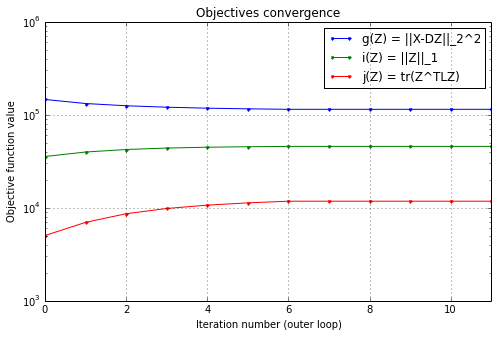

Global objective: 1.720586e+05


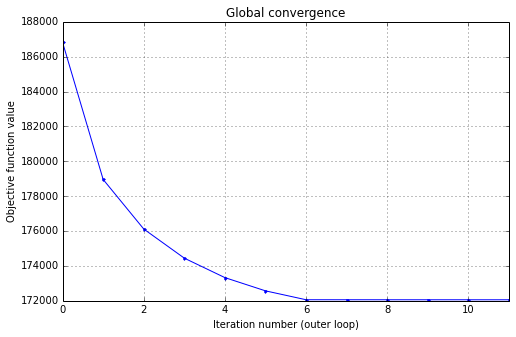

Outer loop: 12 iterations

Z in [-0.0212081614882, 0.280105501413]
Sparsity of Z: 8,819,964 non-zero entries out of 19,072,000 entries, i.e. 46.2%.


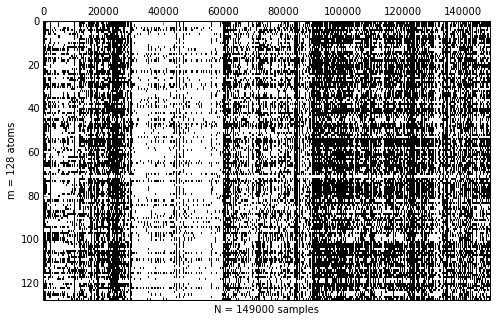

D in [-0.0482563264668, 0.844439685345]
d in [0.999999642372, 1.00000035763]
Constraints on D: True


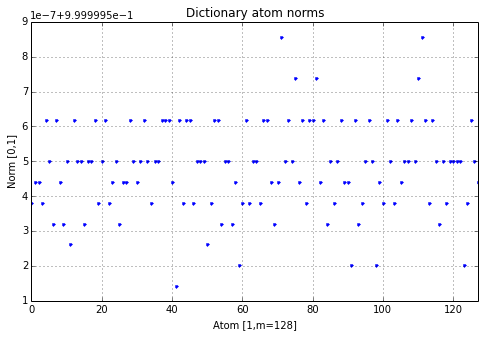

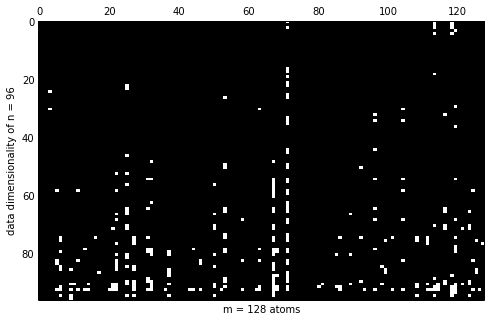

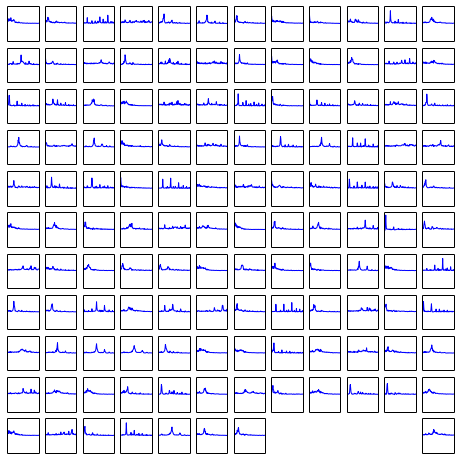

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 3220 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 f

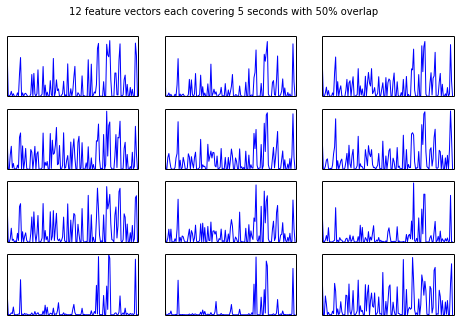

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 70.0 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.4 %
Clips accuracy: 67.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 68 (+/-  8.2) <- [ 0.64  0.82  0.7   0.68  0.66  0.82  0.58  0.56  0.66  0.7 ]
 68 (+/-  3.6) <- [ 0.6   0.68  0.68  0.66  0.72  0.7   0.7   0.74  0.66  0.68]
 69 (+/-  5.7) <- [ 0.68  0.74  0.82  0.62  0.66  0.64  0.72  0.64  0.72  0.68]
 68 (+/-  4.6) <- [ 0.6   0.64  0.76  0.68  0.7   0.68  0.74  0.66  0.64  0.7 ]
 67 (+/-  4.2) <- [ 0.72  0.68  0.7   0.62  0.66  0.66  0.68  0.62  0.76  0.64]
 67 (+/-  6.1) <- [ 0.66  0.68  0.76  0.72  0.64  0.54  0.7

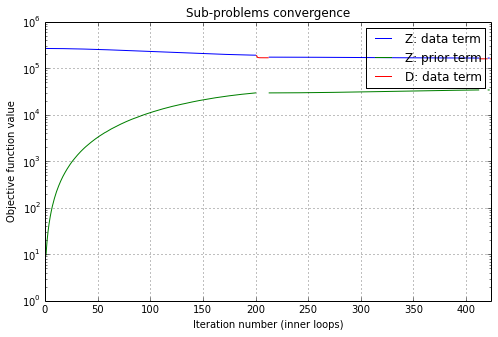

Inner loop: 425 iterations
g(Z) = ||X-DZ||_2^2 = 1.600268e+05
rdiff: 0.000294506304058
i(Z) = ||Z||_1 = 3.421723e+04
j(Z) = tr(Z^TLZ) = 6.200758e+03


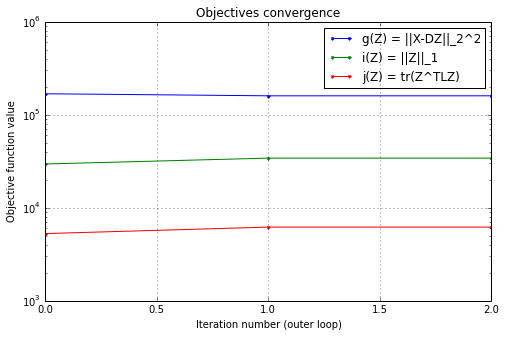

Global objective: 2.004448e+05


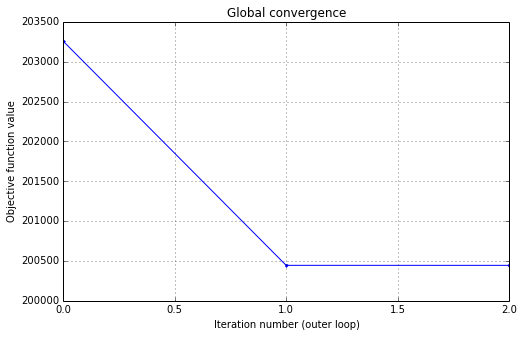

Outer loop: 3 iterations

Z in [-1.27479197545e-05, 0.0141088813543]
Sparsity of Z: 16,930,816 non-zero entries out of 19,072,000 entries, i.e. 88.8%.


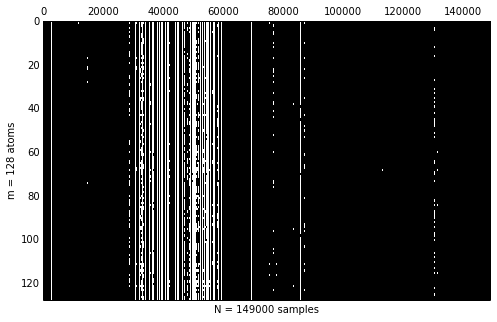

D in [0.0195936579257, 0.24978607893]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


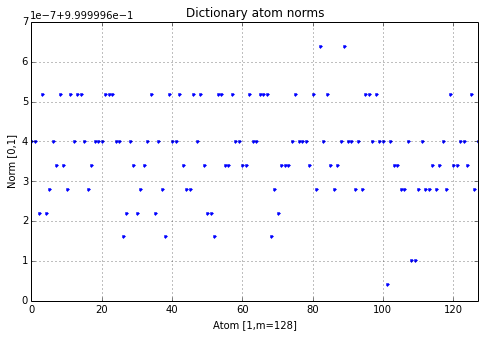

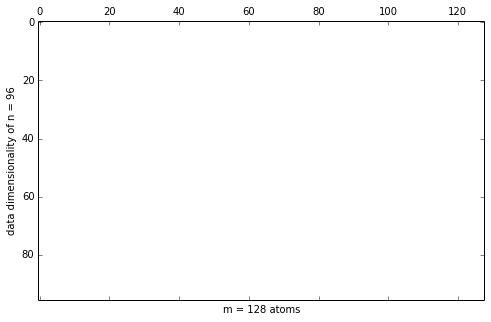

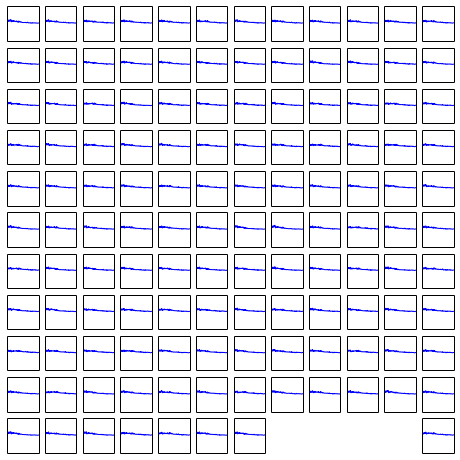

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 923 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 fl

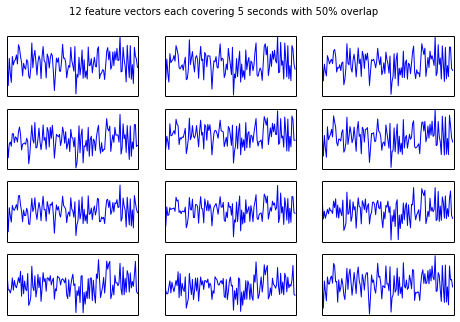

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 52.4 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 50.7 %
Clips accuracy: 51.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 51 (+/-  7.1) <- [ 0.6   0.52  0.44  0.4   0.56  0.54  0.6   0.48  0.58  0.42]
 52 (+/-  4.6) <- [ 0.44  0.54  0.58  0.46  0.56  0.5   0.58  0.56  0.52  0.5 ]
 52 (+/-  7.4) <- [ 0.52  0.46  0.56  0.54  0.4   0.48  0.46  0.66  0.62  0.5 ]
 52 (+/-  5.9) <- [ 0.48  0.4   0.56  0.5   0.54  0.58  0.54  0.5   0.62  0.48]
 51 (+/-  6.9) <- [ 0.5   0.54  0.54  0.56  0.46  0.42  0.6   0.4   0.62  0.48]
 51 (+/-  8.6) <- [ 0.4   0.6   0.58  0.54  0.46  0.4   0.4

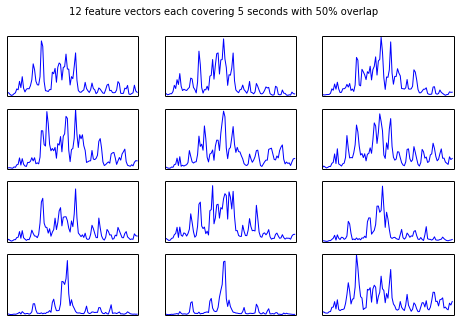

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1152), float64
Labels: (500,), uint8
 67 (+/-  8.0) <- [ 0.72  0.74  0.6   0.48  0.62  0.74  0.72  0.66  0.66  0.74]
 66 (+/-  6.5) <- [ 0.7   0.6   0.62  0.52  0.64  0.7   0.72  0.68  0.66  0.76]
 68 (+/-  6.7) <- [ 0.74  0.68  0.84  0.62  0.68  0.7   0.62  0.62  0.7   0.62]
 68 (+/-  5.5) <- [ 0.6   0.72  0.62  0.66  0.74  0.74  0.72  0.64  0.76  0.64]
 67 (+/-  5.1) <- [ 0.58  0.74  0.66  0.7   0.68  0.64  0.72  0.62  0.74  0.64]
 68 (+/-  6.1) <- [ 0.68  0.78  0.74  0.64  0.72  0.7   0.68 

In [4]:
import numpy as np
import time

texperiment = time.time()

def separator():
    print('\n' + 50 * '-' + '\n')
    # Fair comparison when tuning parameters.
    np.random.seed(1)

#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    %run audio_graph.ipynb
    separator()
if not regen_features:
    %run audio_features.ipynb
    separator()

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        %run audio_graph.ipynb
        separator()
    if regen_features:
        %run audio_features.ipynb
        separator()
    %run audio_classification.ipynb
    separator()

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if not regen_graph and not regen_features:
    # Classifier parameters are being tested.
    for p[Pname] in Pvalues:
        %run audio_classification.ipynb
        separator()
else:
    %run audio_classification.ipynb
    separator()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))